Decision Trees & Random Forests
We are going to predict once again if a passenger on the Titanic is going to survive. This time  using decision trees and random forests:

1. Read your Titanic dataset as usual: Create a training set and a testing set then apply decision tree.

2. Plot your decision tree and try to read the tree branches and conclude a prediction manually.

3. Change the decision tree parameters(at least two parameters).

4. Calculate the new accuracy and compare it with the previous results.

5. Use a random forest then change the number of estimators.

6. Calculate the new accuracy and compare it with the previous result.


In [81]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split

titanic_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/titanic-passengers.csv', sep = ';')

titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [62]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [63]:
missing_values = titanic_data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [64]:
titanic_data['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [96]:
titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())

In [97]:
age = []
td = titanic_data['Age']
for i in td:
  age.append(int(i))

titanic_data['Age'] = age

In [83]:
titanic_data = pd.get_dummies(titanic_data, columns=['Sex'])

In [102]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
0,343,No,2,"Collander, Mr. Erik Gustaf",28,0,0,248740,13.0000,NaN,S,0,1
1,76,No,3,"Moen, Mr. Sigurd Hansen",25,0,0,348123,7.6500,F G73,S,0,1
2,641,No,3,"Jensen, Mr. Hans Peder",20,0,0,350050,7.8542,NaN,S,0,1
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",29,0,4,349909,21.0750,NaN,S,1,0
4,672,No,1,"Davidson, Mr. Thornton",31,1,0,F.C. 12750,52.0000,B71,S,0,1


In [99]:
features = ['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch']
X = titanic_data[features]
y = titanic_data['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

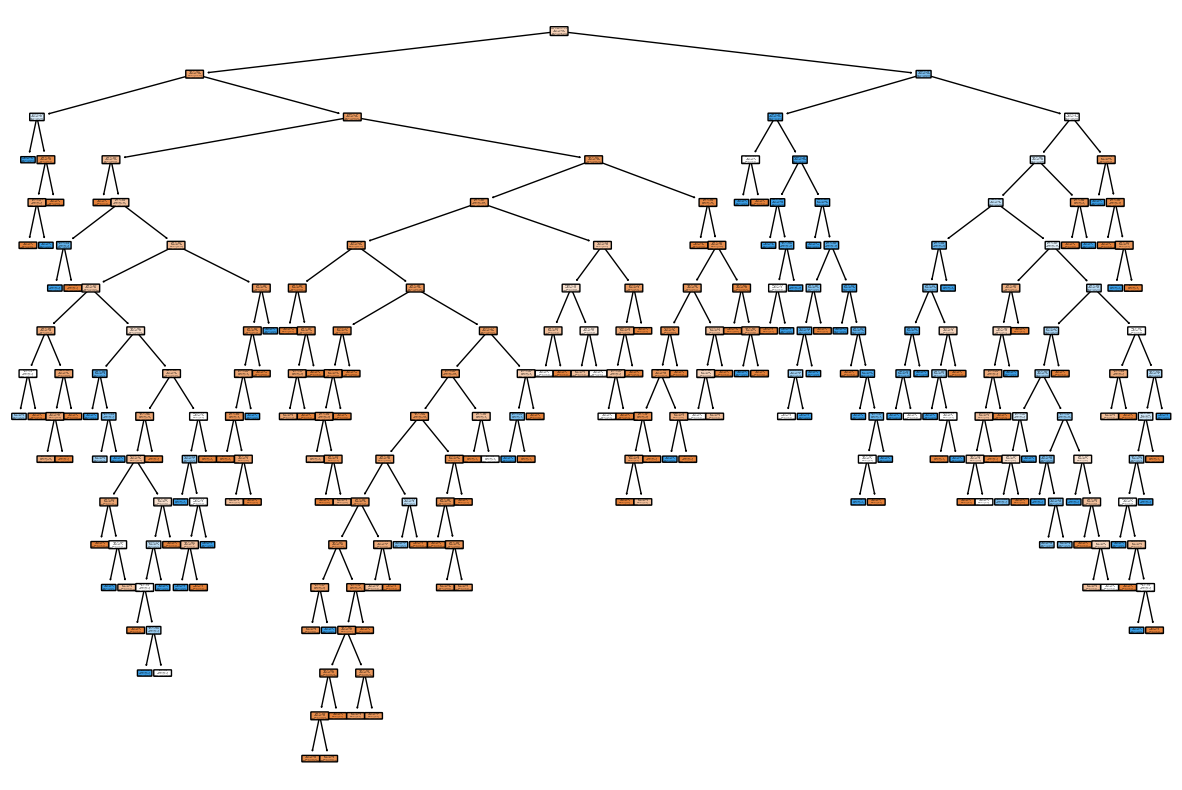

In [101]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

plt.figure(figsize=(15, 10))
plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.show()

In [105]:
# Change decision tree parameters
dt_model_updated = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_model_updated.fit(X_train, y_train)

dt_model_updated

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)